In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd

print("✅ Ready!")

✅ Ready!


       GRAPH CREATION

How do you want to create the graph?
  1. Manual - You define all nodes and edges
  2. Random - Automatically generate a random graph



Enter 1 or 2:  2



RANDOM GRAPH CREATION



How many nodes in total?  30
Start node (0 to 29):  0
End node (0 to 29):  29
Required nodes to visit (comma-separated, or press Enter to skip):  



Generating random graph...

GRAPH CONFIGURATION:
  Total nodes: 30
  Total edges: 90
  Start: 0
  End: 29
  Required nodes: None
  Average out-degree: 3.0


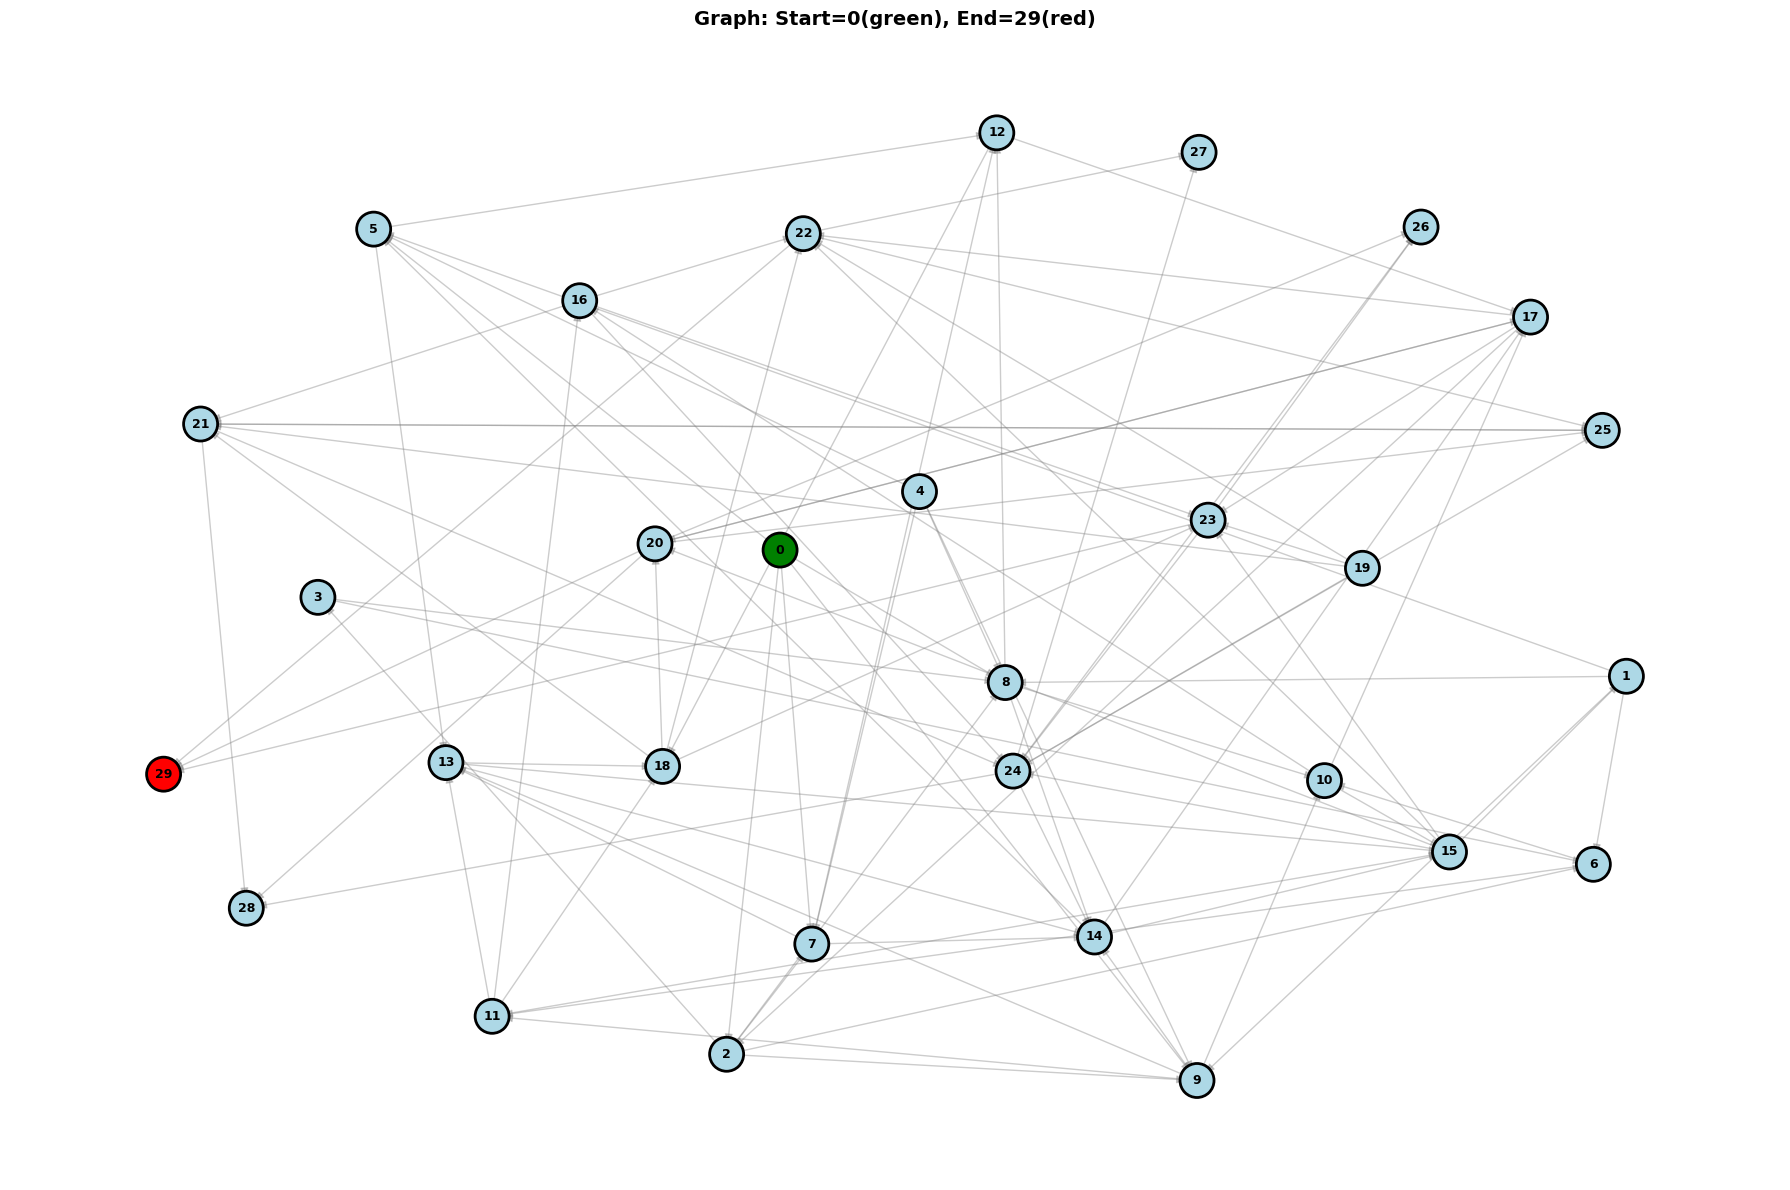


✓ Graph ready! Run the next cell to start ABC algorithm.


In [3]:
# Graph Creation: Manual or Random
import random

print("="*60)
print("       GRAPH CREATION")
print("="*60)

# Choose creation mode
print("\nHow do you want to create the graph?")
print("  1. Manual - You define all nodes and edges")
print("  2. Random - Automatically generate a random graph")

while True:
    mode = input("\nEnter 1 or 2: ").strip()
    if mode in ['1', '2']:
        break
    print("Invalid input! Please enter 1 or 2.")

print("\n" + "="*60)

if mode == '1':
    # ===== MANUAL GRAPH CREATION =====
    print("MANUAL GRAPH CREATION")
    print("="*60)
    
    num_nodes = int(input("\nHow many nodes in total? "))
    print(f"Nodes will be numbered from 0 to {num_nodes-1}")
    
    Gn = nx.DiGraph()
    Gn.add_nodes_from(range(num_nodes))
    
    # Add edges manually
    print("\n--- ADD EDGES ---")
    print("Enter edges one by one (format: source destination weight)")
    print("Example: 0 5 3.5  means: edge from node 0 to node 5 with weight 3.5")
    print("Type 'done' when finished adding edges")
    
    edges_added = 0
    while True:
        edge_input = input(f"\nEdge #{edges_added + 1} (or 'done'): ").strip()
        
        if edge_input. lower() == 'done':
            break
        
        try:
            parts = edge_input.split()
            if len(parts) != 3:
                print("  Error: Please enter exactly 3 values (source destination weight)")
                continue
            
            source = int(parts[0])
            dest = int(parts[1])
            weight = float(parts[2])
            
            if source < 0 or source >= num_nodes or dest < 0 or dest >= num_nodes:
                print(f"  Error: Nodes must be between 0 and {num_nodes-1}")
                continue
            
            if source == dest:
                print("  Error: Source and destination cannot be the same")
                continue
            
            Gn.add_edge(source, dest, weight=weight)
            edges_added += 1
            print(f"  ✓ Added edge: {source} → {dest} (weight={weight})")
            
        except ValueError:
            print("  Error: Invalid format. Use: source destination weight")
    
    print(f"\n✓ Total edges added: {edges_added}")
    
    # Get start, end, required nodes
    print("\n--- PATH CONFIGURATION ---")
    start_node = int(input(f"Start node (0 to {num_nodes-1}): "))
    end_node = int(input(f"End node (0 to {num_nodes-1}): "))
    
    required_input = input("Required nodes to visit (comma-separated, or press Enter to skip): ")
    if required_input. strip():
        required_nodes = [int(x.strip()) for x in required_input.split(',')]
    else:
        required_nodes = []

else:
    # ===== RANDOM GRAPH CREATION =====
    print("RANDOM GRAPH CREATION")
    print("="*60)
    
    num_nodes = int(input("\nHow many nodes in total? "))
    start_node = int(input(f"Start node (0 to {num_nodes-1}): "))
    end_node = int(input(f"End node (0 to {num_nodes-1}): "))
    
    required_input = input("Required nodes to visit (comma-separated, or press Enter to skip): ")
    if required_input.strip():
        required_nodes = [int(x.strip()) for x in required_input. split(',')]
    else:
        required_nodes = []
    
    print("\nGenerating random graph...")
    
    Gn = nx.DiGraph()
    Gn. add_nodes_from(range(num_nodes))
    
    edges = []
    
    if num_nodes < 15:
        # SMALL GRAPH: Simple forward connections
        for i in range(num_nodes):
            # Connect to 2-3 other nodes
            possible_targets = [j for j in range(num_nodes) if j != i and j > i]
            num_connections = min(3, len(possible_targets))
            if num_connections > 0:
                targets = random.sample(possible_targets, num_connections)
                for j in targets:
                    weight = round(random.uniform(1.0, 10.0), 1)
                    edges.append((i, j, weight))
        
        # Add some cross connections
        for i in range(num_nodes):
            if random.random() < 0.3:
                possible = [j for j in range(num_nodes) if j != i and (i, j) not in [(e[0], e[1]) for e in edges]]
                if possible:
                    j = random.choice(possible)
                    weight = round(random. uniform(1.0, 10.0), 1)
                    edges.append((i, j, weight))
    
    else:
        # LARGE GRAPH: Layered structure
        layer_size = max(5, num_nodes // 10)
        num_layers = num_nodes // layer_size
        
        for layer in range(num_layers):
            layer_start = layer * layer_size
            layer_end = min(layer_start + layer_size, num_nodes)
            next_layer_start = layer_end
            next_layer_end = min(next_layer_start + layer_size, num_nodes)
            
            if next_layer_start >= num_nodes:
                break
            
            # Each node connects to 2-4 nodes in next layer
            for i in range(layer_start, layer_end):
                num_connections = random.randint(2, min(4, next_layer_end - next_layer_start))
                targets = random.sample(range(next_layer_start, next_layer_end), num_connections)
                
                for j in targets:
                    weight = round(random.uniform(1.0, 10.0), 1)
                    edges.append((i, j, weight))
            
            # Add lateral connections
            for i in range(layer_start, layer_end - 1):
                if random.random() < 0.3:
                    j = random.randint(i + 1, min(layer_end - 1, num_nodes - 1))
                    weight = round(random.uniform(1.0, 10.0), 1)
                    edges.append((i, j, weight))
        
        # Add backward edges
        if num_nodes > 10:
            for _ in range(num_nodes // 5):
                i = random.randint(10, num_nodes - 1)
                j = random.randint(max(0, i - 15), i - 1)
                weight = round(random.uniform(1.0, 10.0), 1)
                edges.append((i, j, weight))
    
    # Add edges to graph
    for s, d, w in edges:
        Gn.add_edge(s, d, weight=w)
    
    # Ensure connectivity for required nodes
    for req in required_nodes:
        has_incoming = Gn.in_degree(req) > 0
        has_outgoing = Gn.out_degree(req) > 0
        
        if not has_incoming:
            possible_sources = [i for i in range(num_nodes) if i != req and not Gn.has_edge(i, req)]
            if possible_sources:
                source = random. choice(possible_sources)
                weight = round(random.uniform(1.0, 10.0), 1)
                Gn.add_edge(source, req, weight=weight)
                print(f"  + Added edge {source} → {req} (weight={weight}) for connectivity")
        
        if not has_outgoing:
            possible_targets = [i for i in range(num_nodes) if i != req and not Gn.has_edge(req, i)]
            if possible_targets:
                target = random. choice(possible_targets)
                weight = round(random.uniform(1.0, 10.0), 1)
                Gn.add_edge(req, target, weight=weight)
                print(f"  + Added edge {req} → {target} (weight={weight}) for connectivity")
    
    # Ensure start and end have proper connections
    if Gn.out_degree(start_node) == 0:
        possible = [i for i in range(num_nodes) if i != start_node]
        if possible:
            target = random.choice(possible)
            weight = round(random.uniform(1.0, 10.0), 1)
            Gn.add_edge(start_node, target, weight=weight)
            print(f"  + Added edge {start_node} → {target} for start connectivity")
    
    if Gn.in_degree(end_node) == 0:
        possible = [i for i in range(num_nodes) if i != end_node]
        if possible:
            source = random.choice(possible)
            weight = round(random.uniform(1.0, 10.0), 1)
            Gn.add_edge(source, end_node, weight=weight)
            print(f"  + Added edge {source} → {end_node} for end connectivity")

# ===== SUMMARY =====
print(f"\n{'='*60}")
print("GRAPH CONFIGURATION:")
print(f"  Total nodes: {num_nodes}")
print(f"  Total edges: {len(Gn.edges())}")
print(f"  Start: {start_node}")
print(f"  End: {end_node}")
print(f"  Required nodes: {required_nodes if required_nodes else 'None'}")
if len(Gn.edges()) > 0:
    print(f"  Average out-degree: {sum(d for _, d in Gn.out_degree()) / len(Gn.nodes()):.1f}")
print("="*60)

# ===== VISUALIZE =====
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(Gn, k=5, iterations=100, seed=42)

# Color nodes
colors = []
for n in Gn.nodes():
    if n == start_node:
        colors.append('green')
    elif n == end_node:
        colors.append('red')
    elif n in required_nodes:
        colors.append('yellow')
    else:
        colors.append('lightblue')

nx.draw_networkx_nodes(Gn, pos, node_color=colors, node_size=600, edgecolors='black', linewidths=2)
nx.draw_networkx_labels(Gn, pos, font_size=9, font_weight='bold')
nx.draw_networkx_edges(Gn, pos, arrows=True, arrowsize=12, width=1, edge_color='gray', alpha=0.4)

edge_labels = nx.get_edge_attributes(Gn, 'weight')
if len(edge_labels) < 80:  # Only show labels if not too many
    nx.draw_networkx_edge_labels(Gn, pos, edge_labels, font_size=7)

title = f"Graph: Start={start_node}(green), End={end_node}(red)"
if required_nodes:
    title += f", Required={required_nodes}(yellow)"
plt.title(title, fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Store configuration
graph_config = {
    'start_node': start_node,
    'end_node': end_node,
    'required_nodes': required_nodes
}

print("\n✓ Graph ready! Run the next cell to start ABC algorithm.")

In [4]:
class ABC:
    def __init__(self, graph, start_node=None, end_node=None, required_nodes=None, 
                 population_size=10, num_employed=5, num_onlooker=5, limit=10):
        self.G = graph
        self.population_size = population_size
        self.num_employed = num_employed
        self.num_onlooker = num_onlooker
        self.limit = limit
        
        # Use custom start/end or default to first/last
        self.start_node = start_node if start_node is not None else list(graph.nodes())[0]
        self.end_node = end_node if end_node is not None else list(graph.nodes())[-1]
        self.required_nodes = required_nodes if required_nodes else []
        
        self.population = []
        self. best_solution = None
        self.best_fitness = float('inf')
        self.test_cases = 0
        self.history = []
        self.snapshots = []
        self.trial_counter = []
    
    def generate_random_path(self):
        """Generate a random path with more variation"""
        path = [self.start_node]
        current = self.start_node
        visited = set([self.start_node])
        max_steps = len(self.G.nodes()) * 2
        
        while current != self.end_node and len(path) < max_steps:
            neighbors = list(self.G.neighbors(current))
            
            if not neighbors:
                return [self.start_node, self.end_node] if self.G.has_edge(self.start_node, self.end_node) else [self.start_node]
            
            if random.random() < 0.3 and len(visited) > 2:
                available = neighbors
            else:
                available = [n for n in neighbors if n not in visited]
                if not available:
                    available = neighbors
            
            current = random.choice(available)
            path.append(current)
            visited.add(current)
            
            if current == self.end_node:
                break
        
        return path
    
    def mutate_path(self, path):
        """Create a variation of existing path"""
        if len(path) < 3:
            return self.generate_random_path()
        
        new_path = path. copy()
        
        if len(new_path) > 3:
            idx = random.randint(1, len(new_path) - 2)
            node = new_path[idx]
            neighbors = list(self.G.neighbors(node))
            
            if neighbors:
                new_node = random.choice(neighbors)
                if new_node not in new_path:
                    new_path[idx] = new_node
        
        return new_path
    
    def calculate_fitness(self, path):
        """Calculate total cost of path - includes required nodes penalty"""
        if not path or path[-1] != self.end_node:
            return float('inf')
        
        # Check if path starts at correct node
        if path[0] != self.start_node:
            return float('inf')
        
        # Check if all required nodes are in the path
        for req in self.required_nodes:
            if req not in path:
                return float('inf')  # Invalid: missing required node
        
        cost = 0
        for i in range(len(path) - 1):
            if self.G.has_edge(path[i], path[i+1]):
                cost += self. G[path[i]][path[i+1]]['weight']
            else:
                return float('inf')
        return cost
    
    def run(self, max_iterations=100):
        """Run ABC algorithm - only snapshot on improvement"""
        print(f"Starting ABC Algorithm...")
        print(f"  Start: {self.start_node}")
        print(f"  End: {self.end_node}")
        print(f"  Required nodes: {self.required_nodes if self.required_nodes else 'None'}")
        print(f"  Will only save snapshots when path improves!\n")
        
        # Initialize diverse population
        self.population = []
        for _ in range(self.population_size):
            self.population.append(self.generate_random_path())
        
        self.trial_counter = [0] * self.population_size
        
        valid_solutions = [p for p in self.population if self.calculate_fitness(p) != float('inf')]
        if valid_solutions:
            self. best_solution = min(valid_solutions, key=self.calculate_fitness)
            self.best_fitness = self.calculate_fitness(self.best_solution)
        else:
            self.best_solution = self.population[0]
            self.best_fitness = float('inf')
        
        # Save initial snapshot
        self.snapshots.append({
            'iteration': 0,
            'path': self.best_solution. copy(),
            'fitness': self.best_fitness
        })
        print(f"Iteration 0: Initial solution found - Cost = {self.best_fitness:.2f}")
        
        for iteration in range(1, max_iterations + 1):
            # EMPLOYED BEES
            for i in range(self.num_employed):
                if random.random() < 0.5:
                    new_path = self.generate_random_path()
                else:
                    new_path = self.mutate_path(self.population[i])
                
                new_fitness = self.calculate_fitness(new_path)
                old_fitness = self.calculate_fitness(self.population[i])
                
                if new_fitness < old_fitness:
                    self.population[i] = new_path
                    self.trial_counter[i] = 0
                else:
                    self.trial_counter[i] += 1
                
                self.test_cases += 1
            
            # ONLOOKER BEES
            for i in range(self.num_onlooker):
                if random. random() < 0.5:
                    new_path = self.generate_random_path()
                else:
                    idx = random.randint(0, self.population_size - 1)
                    new_path = self.mutate_path(self.population[idx])
                
                new_fitness = self.calculate_fitness(new_path)
                
                idx = random.randint(0, self.population_size - 1)
                old_fitness = self.calculate_fitness(self.population[idx])
                
                if new_fitness < old_fitness:
                    self.population[idx] = new_path
                    self.trial_counter[idx] = 0
                else:
                    self.trial_counter[idx] += 1
                
                self.test_cases += 1
            
            # SCOUT BEES
            for i in range(self.population_size):
                if self.trial_counter[i] > self.limit:
                    self. population[i] = self.generate_random_path()
                    self.trial_counter[i] = 0
                    print(f"  [Iteration {iteration}] Scout bee exploring new area...")
            
            # ELITE PRESERVATION
            worst_idx = max(range(self.population_size), key=lambda i: self. calculate_fitness(self.population[i]))
            if self.calculate_fitness(self. population[worst_idx]) > self.best_fitness:
                self.population[worst_idx] = self.best_solution. copy()
            
            # Update best - ONLY SNAPSHOT IF IMPROVED
            valid_solutions = [p for p in self.population if self.calculate_fitness(p) != float('inf')]
            if valid_solutions:
                current_best = min(valid_solutions, key=self.calculate_fitness)
                current_best_fitness = self.calculate_fitness(current_best)
                
                # Check if we found a BETTER solution
                if current_best_fitness < self.best_fitness:
                    self.best_solution = current_best. copy()
                    self.best_fitness = current_best_fitness
                    
                    # SAVE SNAPSHOT - Path improved!  
                    self.snapshots.append({
                        'iteration': iteration,
                        'path': self.best_solution.copy(),
                        'fitness': self.best_fitness
                    })
                    print(f"Iteration {iteration}: NEW BEST PATH FOUND!  Cost = {self.best_fitness:.2f}")
            
            self.history.append([iteration, self.best_fitness, self.test_cases])
        
        # Always save final snapshot
        if self.snapshots[-1]['iteration'] != max_iterations:
            self. snapshots.append({
                'iteration': max_iterations,
                'path': self.best_solution.copy(),
                'fitness': self.best_fitness
            })
            print(f"\nIteration {max_iterations}: Final result - Cost = {self.best_fitness:.2f}")
        
        print(f"\nAlgorithm complete!")
        print(f"Total snapshots saved: {len(self. snapshots)} (only improvements! )")
        return self.best_solution, self. best_fitness

print("ABC class ready with custom start/end/required nodes support!")

ABC class ready with custom start/end/required nodes support!


In [5]:
# Create ABC with custom start, end, and required nodes
abc = ABC(Gn, 
          start_node=graph_config['start_node'],
          end_node=graph_config['end_node'],
          required_nodes=graph_config['required_nodes'],
          population_size=50, 
          num_employed=25, 
          num_onlooker=25, 
          limit=5)

# Run algorithm
best_path, best_fitness = abc.run(max_iterations=200)

# Show results
print(f"\n{'='*60}")
print(f"FINAL RESULTS:")
print(f"   Best Path: {' → '.join(map(str, best_path))}")
print(f"   Path Length: {len(best_path)} nodes")
print(f"   Best Fitness: {best_fitness:.2f}")
print(f"   Required nodes visited: {[n for n in best_path if n in graph_config['required_nodes']]}")
print(f"   Test Cases: {abc.test_cases}")
print(f"{'='*60}")

Starting ABC Algorithm...
  Start: 0
  End: 29
  Required nodes: None
  Will only save snapshots when path improves!

Iteration 0: Initial solution found - Cost = 19.50
  [Iteration 3] Scout bee exploring new area...
  [Iteration 3] Scout bee exploring new area...
  [Iteration 4] Scout bee exploring new area...
  [Iteration 4] Scout bee exploring new area...
  [Iteration 4] Scout bee exploring new area...
  [Iteration 4] Scout bee exploring new area...
  [Iteration 4] Scout bee exploring new area...
  [Iteration 4] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 5] Scout bee exploring new area...
  [Iteration 7]

In [19]:
from matplotlib. animation import FuncAnimation
from IPython.display import HTML
import matplotlib.patches as mpatches

# Create animation of path evolution with info box
print("Creating animation...")

fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.3)

ax_graph = fig.add_subplot(gs[0])  # Graph on the left
ax_info = fig. add_subplot(gs[1])   # Info box on the right

# Fixed layout for all frames
pos = nx. spring_layout(Gn, k=5, iterations=100, seed=42)

# Color nodes
node_colors = []
for n in Gn.nodes():
    if n == graph_config['start_node']:
        node_colors.append('green')
    elif n == graph_config['end_node']:
        node_colors.append('red')
    elif n in graph_config['required_nodes']:
        node_colors.append('yellow')
    else:
        node_colors.append('lightblue')

def init():
    """Initialize the animation"""
    ax_graph.clear()
    ax_info.clear()
    ax_graph.set_xlim([min(x for x, y in pos. values()) - 0.1, max(x for x, y in pos.values()) + 0.1])
    ax_graph. set_ylim([min(y for x, y in pos.values()) - 0.1, max(y for x, y in pos.values()) + 0.1])
    ax_graph.axis('off')
    ax_info.axis('off')
    return []

def animate(frame):
    """Animation function"""
    ax_graph.clear()
    ax_info.clear()
    
    ax_graph.set_xlim([min(x for x, y in pos.values()) - 0.1, max(x for x, y in pos.values()) + 0.1])
    ax_graph. set_ylim([min(y for x, y in pos.values()) - 0.1, max(y for x, y in pos.values()) + 0.1])
    ax_graph.axis('off')
    ax_info.axis('off')
    
    # Determine which snapshot and which edge we're drawing
    total_frames = sum(len(snap['path']) - 1 for snap in abc. snapshots if snap['fitness'] != float('inf'))
    
    if total_frames == 0:
        # No valid paths
        ax_graph.text(0.5, 0.5, 'No valid path found', 
               transform=ax_graph.transAxes, ha='center', va='center',
               fontsize=20, color='red', fontweight='bold')
        
        ax_info.text(0.5, 0.5, 'NO VALID PATH', 
                    ha='center', va='center', fontsize=14, color='red',
                    bbox=dict(boxstyle='round,pad=1', facecolor='lightcoral', 
                             edgecolor='darkred', linewidth=3))
        return []
    
    # Find which snapshot and edge this frame belongs to
    current_frame = 0
    current_snapshot = None
    edge_index = 0
    
    for snap in abc.snapshots:
        if snap['fitness'] == float('inf'):
            continue
        
        path_length = len(snap['path']) - 1
        if current_frame + path_length > frame:
            current_snapshot = snap
            edge_index = frame - current_frame
            break
        current_frame += path_length
    
    if current_snapshot is None:
        return []
    
    # === DRAW GRAPH ===
    # Draw all edges in light gray
    nx.draw_networkx_edges(Gn, pos, arrows=True, arrowsize=10, width=0.5,
                          edge_color='gray', alpha=0.15, ax=ax_graph)
    
    # Draw nodes
    nx.draw_networkx_nodes(Gn, pos, node_color=node_colors, node_size=500,
                          edgecolors='black', linewidths=2, ax=ax_graph)
    nx.draw_networkx_labels(Gn, pos, font_size=8, font_weight='bold', ax=ax_graph)
    
    # Draw the path up to this edge
    path = current_snapshot['path']
    
    # Draw completed edges in red
    if edge_index > 0:
        completed_edges = [(path[i], path[i+1]) for i in range(edge_index)]
        nx.draw_networkx_edges(Gn, pos, edgelist=completed_edges, arrows=True,
                              arrowsize=15, width=3.5, edge_color='red', 
                              connectionstyle='arc3,rad=0.1', ax=ax_graph)
    
    # Draw the current edge being animated (partial)
    if edge_index < len(path) - 1:
        start_node = path[edge_index]
        end_node = path[edge_index + 1]
        
        # Get positions
        start_pos = pos[start_node]
        end_pos = pos[end_node]
        
        # Calculate partial edge
        progress = (frame - current_frame + edge_index) % 1
        if progress == 0:
            progress = 1
        
        # Interpolate position
        partial_x = start_pos[0] + (end_pos[0] - start_pos[0]) * progress
        partial_y = start_pos[1] + (end_pos[1] - start_pos[1]) * progress
        
        # Draw partial edge
        ax_graph.annotate('', xy=(partial_x, partial_y), xytext=start_pos,
                   arrowprops=dict(arrowstyle='->', lw=3.5, color='orange', 
                                 connectionstyle='arc3,rad=0.1'))
    
    # Title
    iteration = current_snapshot['iteration']
    fitness = current_snapshot['fitness']
    ax_graph.set_title(f"Iteration {iteration} - Drawing Path", 
                      fontsize=14, fontweight='bold', pad=20)
    
    # === DRAW INFO BOX ===
    # Prepare path display
    if len(path) > 15:
        path_display = ' → '.join(map(str, path[:7])) + '\n→ ... →\n' + ' → '.join(map(str, path[-7:]))
    else:
        path_str = ' → '.join(map(str, path))
        # Break into lines of ~30 chars
        words = path_str.split(' → ')
        lines = []
        current_line = []
        current_length = 0
        
        for word in words:
            if current_length + len(word) + 4 > 30 and current_line:
                lines. append(' → '.join(current_line))
                current_line = [word]
                current_length = len(word)
            else:
                current_line.append(word)
                current_length += len(word) + 4
        
        if current_line:
            lines.append(' → '.join(current_line))
        
        path_display = '\n'.join(lines)
    
    # Calculate cost so far (only completed edges)
    cost_so_far = 0
    for i in range(min(edge_index, len(path) - 1)):
        if Gn.has_edge(path[i], path[i+1]):
            cost_so_far += Gn[path[i]][path[i+1]]['weight']
    
    # Create info text
    info_lines = [
        f"║ITERATION: {iteration:<12} ",
        f" TOTAL COST: {fitness:<11.2f} ",
        f" COST SO FAR: {cost_so_far:<10.2f} ",
        "                        ",
        f" PATH LENGTH: {len(path):<10} ",
        f" EDGES DRAWN: {edge_index + 1}/{len(path) - 1:<8} ",
        "                        ",
        " CURRENT PATH:           ",
    ]
    
    # Add path (highlight completed portion)
    path_so_far = path[:edge_index + 1]
    if len(path_so_far) > 10:
        path_preview = f"{' → '.join(map(str, path_so_far[:5]))} → ... → {' → '.join(map(str, path_so_far[-3:]))}"
    else:
        path_preview = ' → '.join(map(str, path_so_far))
    
    # Wrap path preview
    if len(path_preview) > 23:
        # Split into multiple lines
        preview_words = path_preview.split(' → ')
        preview_lines = []
        current_preview_line = []
        current_preview_length = 0
        
        for word in preview_words:
            if current_preview_length + len(word) + 4 > 21 and current_preview_line:
                preview_lines.append(' → '.join(current_preview_line))
                current_preview_line = [word]
                current_preview_length = len(word)
            else:
                current_preview_line.append(word)
                current_preview_length += len(word) + 4
        
        if current_preview_line:
            preview_lines.append(' → '.join(current_preview_line))
        
        for line in preview_lines:
            info_lines.append(f" {line:<23} ")
    else:
        info_lines.append(f" {path_preview:<23} ")
    
    info_lines.extend([
        "                        ",
        f" START: {graph_config['start_node']:<16} ",
        f" END: {graph_config['end_node']:<18} "
    ])
    
    info_text = '\n'.join(info_lines)
    
    # Display info box
    ax_info. text(0.5, 0.5, info_text,
                fontsize=9,
                family='monospace',
                ha='center',
                va='center',
                bbox=dict(boxstyle='round,pad=1', facecolor='lightgreen', 
                         edgecolor='darkgreen', linewidth=3))
    
    return []

# Calculate total frames needed
total_frames = sum(len(snap['path']) - 1 for snap in abc.snapshots if snap['fitness'] != float('inf'))

if total_frames == 0:
    print("⚠️ No valid paths to animate!")
    # Just show the graph
    ax_graph.clear()
    ax_info.clear()
    
    nx.draw_networkx_edges(Gn, pos, arrows=True, arrowsize=10, width=0.5,
                          edge_color='gray', alpha=0.3, ax=ax_graph)
    nx.draw_networkx_nodes(Gn, pos, node_color=node_colors, node_size=500,
                          edgecolors='black', linewidths=2, ax=ax_graph)
    nx. draw_networkx_labels(Gn, pos, font_size=8, font_weight='bold', ax=ax_graph)
    ax_graph.set_title("No valid path found", fontsize=16, color='red')
    ax_graph.axis('off')
    
    ax_info.text(0.5, 0.5, 'NO VALID\nPATH FOUND',
                ha='center', va='center', fontsize=14, color='red',
                bbox=dict(boxstyle='round,pad=1', facecolor='lightcoral', 
                         edgecolor='darkred', linewidth=3))
    ax_info.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    # Create animation
    anim = FuncAnimation(fig, animate, init_func=init, frames=total_frames,
                        interval=400, blit=True, repeat=True)
    
    plt.close()  # Don't show the static figure
    
    print(f"✓ Animation created with {total_frames} frames")
    print(f"✓ Showing {len([s for s in abc. snapshots if s['fitness'] != float('inf')])} path improvements")
    
    # Display the animation
    display(HTML(anim.to_jshtml()))

print("\n" + "="*60)

Creating animation...
✓ Animation created with 20 frames
✓ Showing 4 path improvements


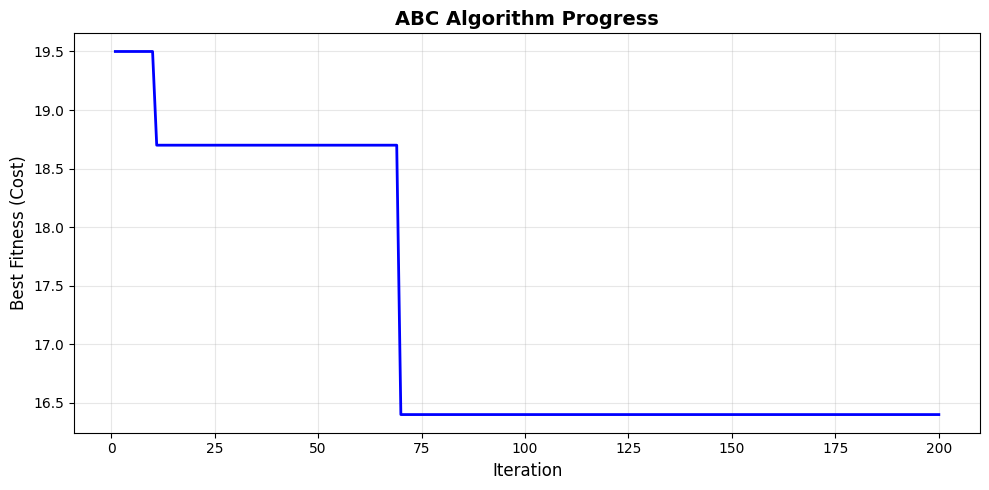

✅ Final best fitness: 16.40
✅ Total test cases: 10000


In [20]:
# Plot how fitness improved over iterations
df = pd.DataFrame(abc.history, columns=['Iteration', 'Best Fitness', 'Test Cases'])

plt.figure(figsize=(10, 5))
plt.plot(df['Iteration'], df['Best Fitness'], linewidth=2, color='blue')
plt.xlabel('Iteration', fontsize=12)
plt. ylabel('Best Fitness (Cost)', fontsize=12)
plt.title('ABC Algorithm Progress', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt. show()

print(f"✅ Final best fitness: {best_fitness:.2f}")
print(f"✅ Total test cases: {abc.test_cases}")